In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_normalize import prepare_data, normalize_data, prepare_sequences, prepare_tensors, split_train_and_test_data, get_lstm_data
from utils.chart import config_chart


---

## For **prepare_data** function

In [3]:
data = prepare_data()
data

,Close
Date,
2000-01-03,1455.219971
2000-01-04,1399.420044
2000-01-05,1402.109985
2000-01-06,1403.449951
2000-01-07,1441.469971
...,...
2024-01-25,4894.160156
2024-01-26,4890.970215
2024-01-29,4927.930176


In [4]:
data.dtypes

Close    float64
dtype: object

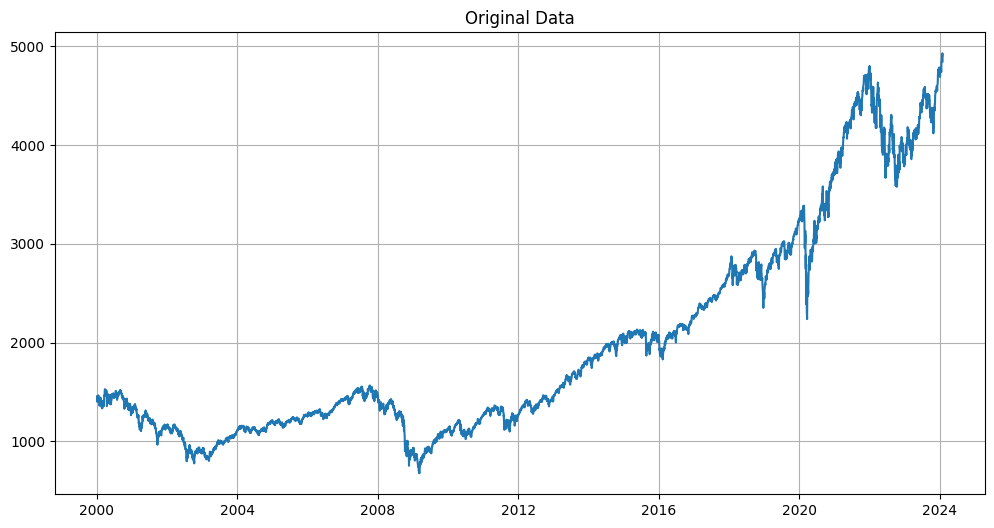

In [5]:
plt = config_chart('Original Data')
plt.plot(data)

---

## For **normalize_data** function

In [6]:
normalized_data = normalize_data(data)
normalized_data

,Close
Date,
2000-01-03,0.246529
2000-01-04,0.236029
2000-01-05,0.236535
2000-01-06,0.236787
2000-01-07,0.243941
...,...
2024-01-25,0.893645
2024-01-26,0.893045
2024-01-29,0.900000


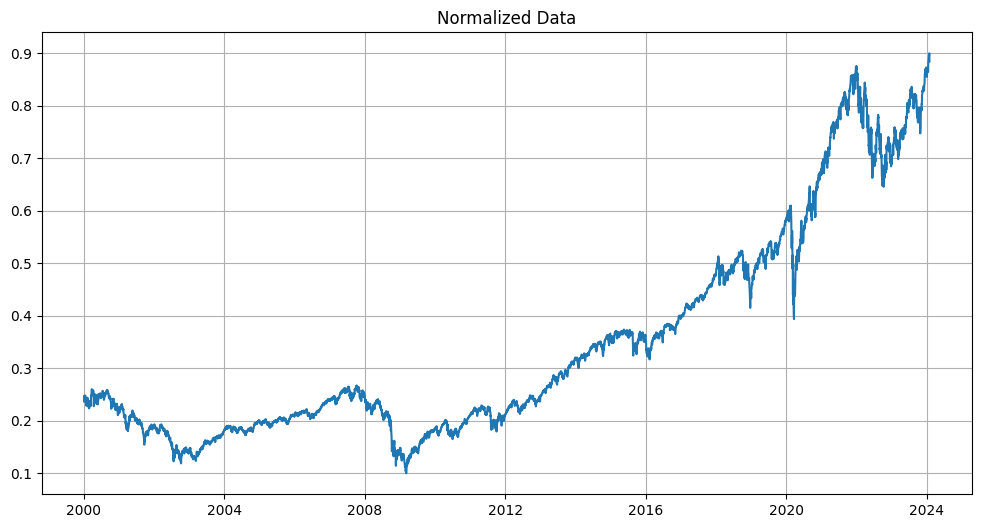

In [7]:
plt = config_chart('Normalized Data')
plt.plot(normalized_data)

----

## For **prepare_sequences** function

In [8]:
x, y, dates = prepare_sequences(normalized_data)

In [9]:
x.shape, y.shape, dates.shape

((6048, 10), (6048,), (6048,))

In [10]:
x[0]

array([0.24652866, 0.2360286 , 0.23653478, 0.23678692, 0.24394127,
       0.24697651, 0.24339371, 0.24220632, 0.24548619, 0.24839723])

In [11]:
x

array([[0.24652866, 0.2360286 , 0.23653478, ..., 0.24220632, 0.24548619,
        0.24839723],
       [0.2360286 , 0.23653478, 0.23678692, ..., 0.24548619, 0.24839723,
        0.24651361],
       [0.23653478, 0.23678692, 0.24394127, ..., 0.24839723, 0.24651361,
        0.24665662],
       ...,
       [0.87288421, 0.8695253 , 0.86448789, ..., 0.8888262 , 0.89364538,
        0.89304512],
       [0.8695253 , 0.86448789, 0.87234036, ..., 0.89364538, 0.89304512,
        0.9       ],
       [0.86448789, 0.87234036, 0.88341815, ..., 0.89304512, 0.9       ,
        0.89944301]])

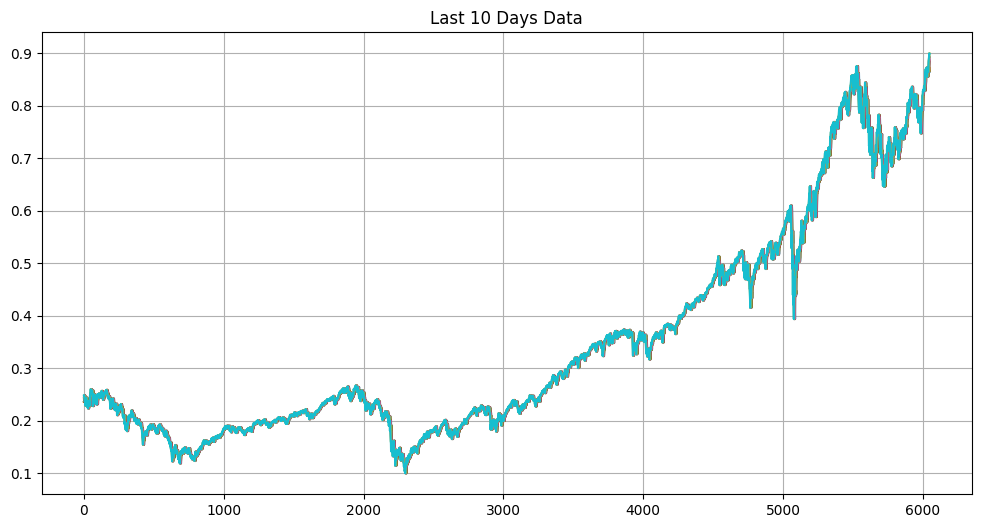

In [12]:
# plot_chart_line(x, label='Price', title='Data')
plt = config_chart('Last 10 Days Data')
plt.plot(x)

In [13]:
y[0]

0.24651361123848506

In [14]:
y

array([0.24651361, 0.24665662, 0.24471278, ..., 0.9       , 0.89944301,
       0.88451705])

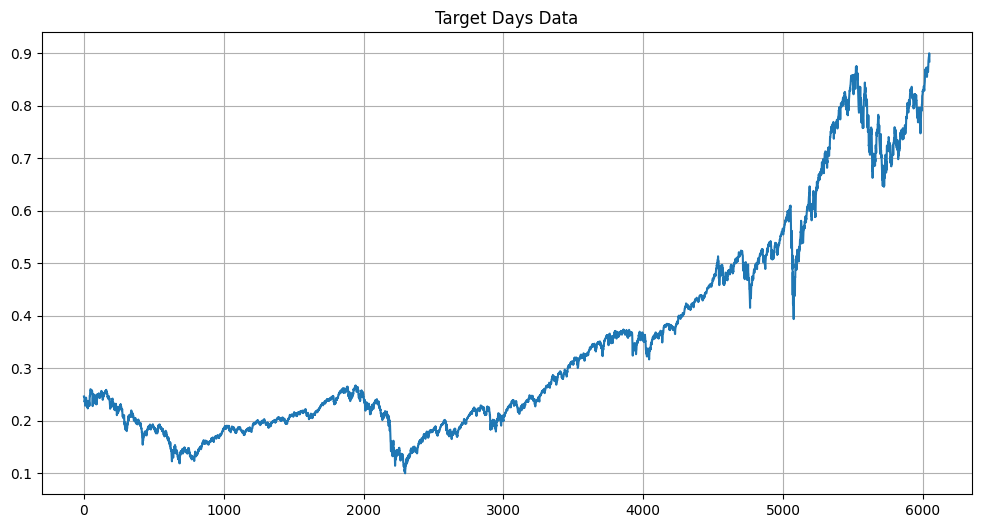

In [15]:
plt = config_chart('Target Days Data')
plt.plot(y)

In [16]:
dates

array(['2000-01-18T00:00:00.000000000', '2000-01-19T00:00:00.000000000',
       '2000-01-20T00:00:00.000000000', ...,
       '2024-01-29T00:00:00.000000000', '2024-01-30T00:00:00.000000000',
       '2024-01-31T00:00:00.000000000'], dtype='datetime64[ns]')

---

## For **split_train_and_test_data** function

In [17]:
train, test, predict = split_train_and_test_data(x, y, dates)

In [18]:
train['x'].shape, train['y'].shape, train['dates'].shape

((4838, 10), (4838,), (4838,))

In [19]:
test['x'].shape, test['y'].shape, test['dates'].shape

((605, 10), (605,), (605,))

In [20]:
predict['x'].shape, predict['y'].shape, predict['dates'].shape

((605, 10), (605,), (605,))

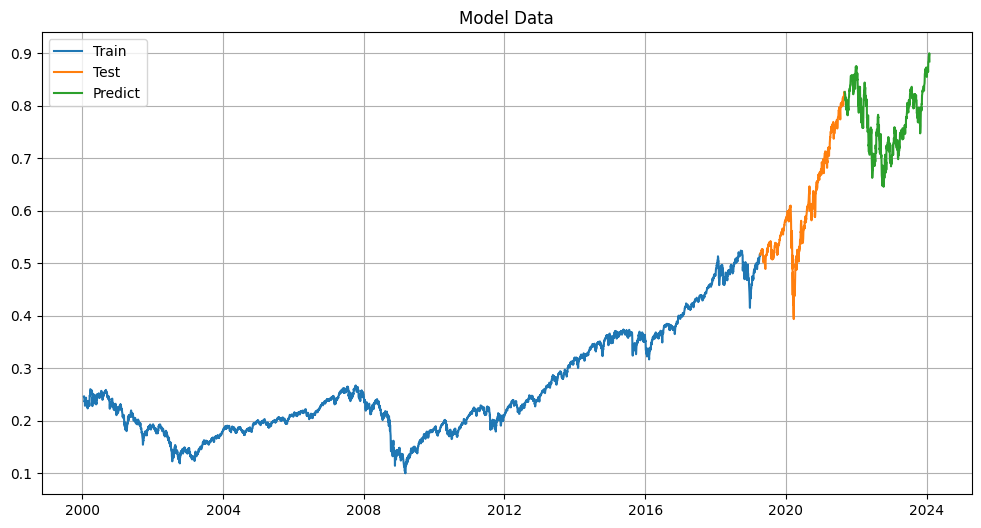

In [21]:
plt = config_chart('Model Data')
plt.plot(train['dates'], train['y'])
plt.plot(test['dates'], test['y'])
plt.plot(predict['dates'], predict['y'])
plt.legend(['Train', 'Test', 'Predict'])

---

## For **prepare_tensors** function

In [22]:
x_train, y_train = prepare_tensors(train['x'], train['y'])
x_test, y_test = prepare_tensors(test['x'], test['y'])
x_predict, y_predict = prepare_tensors(predict['x'], predict['y'])

In [23]:
x_train.shape, y_train.shape

(TensorShape([4838, 10, 1]), TensorShape([4838]))

In [24]:
print('x_train:', x_train.shape)
print(x_train[0])

x_train: (4838, 10, 1)
tf.Tensor(
[[0.24652866]
 [0.2360286 ]
 [0.23653477]
 [0.23678692]
 [0.24394128]
 [0.24697651]
 [0.2433937 ]
 [0.24220632]
 [0.24548618]
 [0.24839723]], shape=(10, 1), dtype=float32)


In [25]:
print('y_train:', y_train.shape)
print(y_train[0])

y_train: (4838,)
tf.Tensor(0.2465136, shape=(), dtype=float32)


In [26]:
x_test.shape, y_test.shape

(TensorShape([605, 10, 1]), TensorShape([605]))

In [27]:
print('x_test:',x_test.shape)
print(x_test[0])

x_test: (605, 10, 1)
tf.Tensor(
[[0.50248575]
 [0.5060535 ]
 [0.5122237 ]
 [0.51223314]
 [0.51339227]
 [0.5145194 ]
 [0.51703155]
 [0.5176017 ]
 [0.5142955 ]
 [0.5161791 ]], shape=(10, 1), dtype=float32)


In [28]:
print('y_test:',y_test.shape)
print(y_test[0])

y_test: (605,)
tf.Tensor(0.5161998, shape=(), dtype=float32)


---

## For **get_lstm_data** function

In [29]:
train, test, predict = get_lstm_data()

In [30]:
print(train['dates'].shape) 
print(train['dates'][0])

print(train['x'].shape) 
print(train['x'][0])

print(train['y'].shape)
print(train['y'][0])

(4838,)
2000-01-18T00:00:00.000000000
(4838, 10, 1)
tf.Tensor(
[[0.24652866]
 [0.2360286 ]
 [0.23653477]
 [0.23678692]
 [0.24394128]
 [0.24697651]
 [0.2433937 ]
 [0.24220632]
 [0.24548618]
 [0.24839723]], shape=(10, 1), dtype=float32)
(4838,)
tf.Tensor(0.2465136, shape=(), dtype=float32)


In [31]:
print(test['dates'].shape) 
print(test['dates'][0])

print(test['x'].shape) 
print(test['x'][0])

print(test['y'].shape)
print(test['y'][0])

(605,)
2019-04-11T00:00:00.000000000
(605, 10, 1)
tf.Tensor(
[[0.50248575]
 [0.5060535 ]
 [0.5122237 ]
 [0.51223314]
 [0.51339227]
 [0.5145194 ]
 [0.51703155]
 [0.5176017 ]
 [0.5142955 ]
 [0.5161791 ]], shape=(10, 1), dtype=float32)
(605,)
tf.Tensor(0.5161998, shape=(), dtype=float32)


In [32]:
print(predict['dates'].shape) 
print(predict['dates'][0])

print(predict['x'].shape) 
print(predict['x'][0])

print(predict['y'].shape)
print(predict['y'][0])

(605,)
2021-09-03T00:00:00.000000000
(605, 10, 1)
tf.Tensor(
[[0.8084988 ]
 [0.81562304]
 [0.8168838 ]
 [0.818758  ]
 [0.8138298 ]
 [0.82123816]
 [0.82489246]
 [0.82374275]
 [0.82400805]
 [0.826428  ]], shape=(10, 1), dtype=float32)
(605,)
tf.Tensor(0.82614195, shape=(), dtype=float32)
